In [11]:
# IMPORT NEEDED LIBRARIES 
import pandas as pd
import numpy as np
import warnings
import pmdarima as pm 
import math
from pmdarima import auto_arima
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from common.preprocessor import load_data
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [12]:
# load data from the preprocessor and set index to date column
data = pd.read_csv('Modified Data.csv', parse_dates=True, index_col=[0])

In [13]:
data.head() # display the first 5 rows of the data

,Price
2002-01-01,19.96
2002-02-01,20.19
2002-03-01,24.03
2002-04-01,26.03
2002-05-01,25.69


In [14]:
data.describe() # display the summary statistics of the data

,Price
count,252.00
mean,69.46
std,28.03
min,19.96
25%,48.47
50%,65.47
75%,91.95
max,134.79


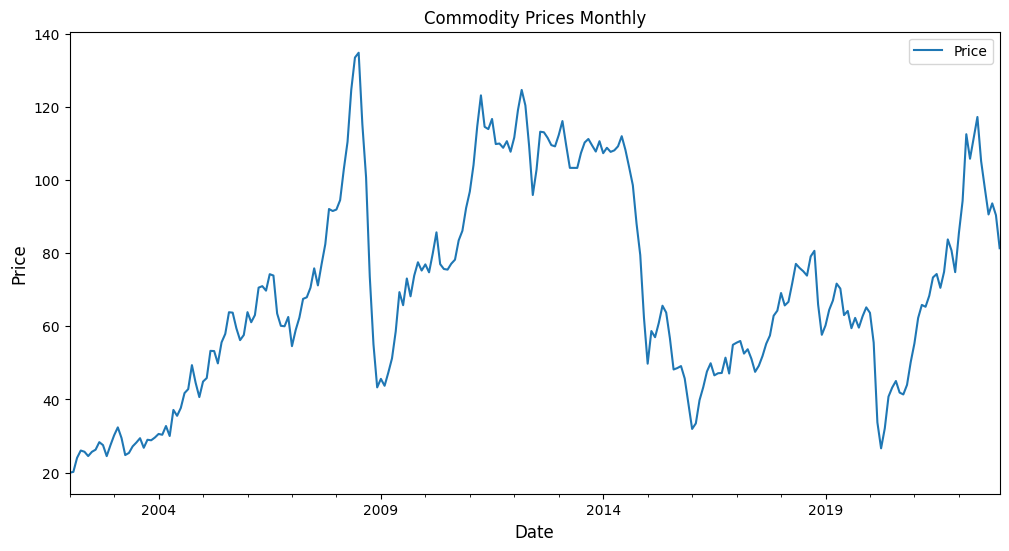

In [15]:
# visualize the data
data.plot(y='Price', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [19]:
# from matplotlib.pyplot import xlabel, ylabel


px.line(data, x=data.index, y=data['Price'], title="Brent Crude Oil Prices from 2002 -2022")

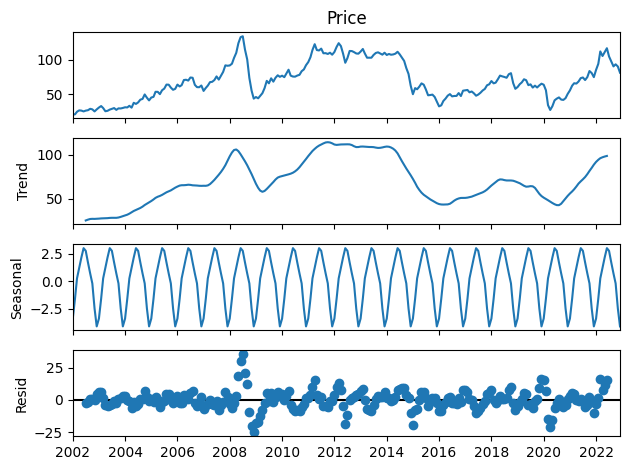

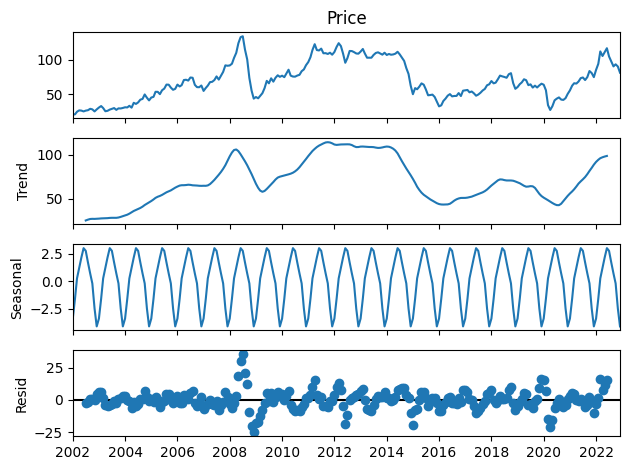

In [20]:
# visualize the components of the data
decomposition = seasonal_decompose(data["Price"], model="additive")  # "Price" is likely your column name for oil prices
decomposition.plot()  # Visualize the trend, seasonal component, and residuals

In [21]:
# Check for stationarity with ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is likely stationary.")
    else:
        print("Data may be non-stationary. Consider differencing.")

print("Testing stationarity of scaled training data:")
adf_test(data['Price'])

Testing stationarity of scaled training data:
ADF Statistic: -2.883602424447067
p-value: 0.04728831004955812
Data is likely stationary.


In [22]:
# Identify number of differences required (if necessary)
n_diffs = pm.arima.ndiffs(data['Price'], test='adf')
print(f"\nNumber of differences required for scaled training data: {n_diffs}")



Number of differences required for scaled training data: 1


In [23]:
# Perform differencing if required
if n_diffs > 0:
    differenced_data = data.diff(n_diffs).dropna()
else:
    differenced_data = data.copy()

<Axes: >

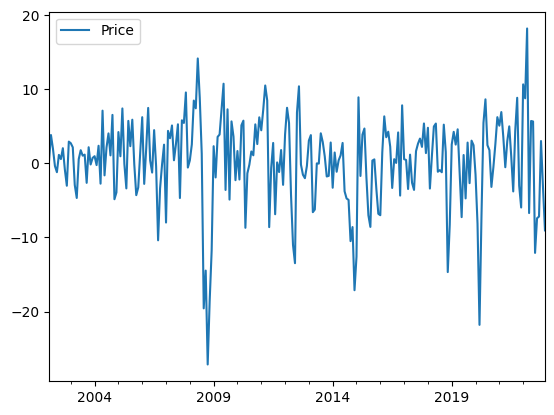

In [24]:
# plot differenced data
differenced_data.plot()

In [25]:
# check seasonal differencing
from pmdarima.arima.utils import nsdiffs

nsdiff= nsdiffs(data['Price'], m=12, test='ch')
print(f"Seasonal differences required: {nsdiff}")

Seasonal differences required: 0


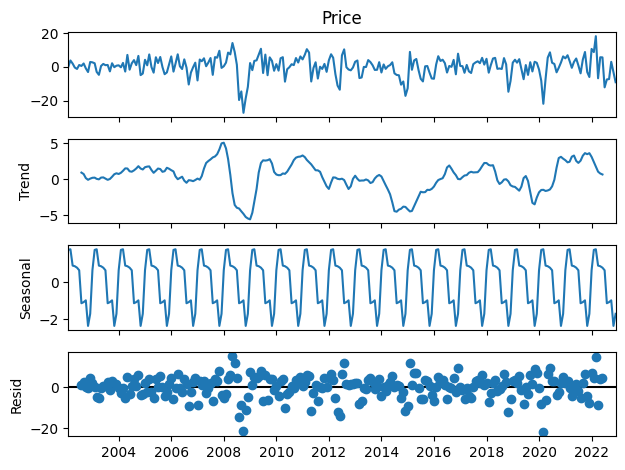

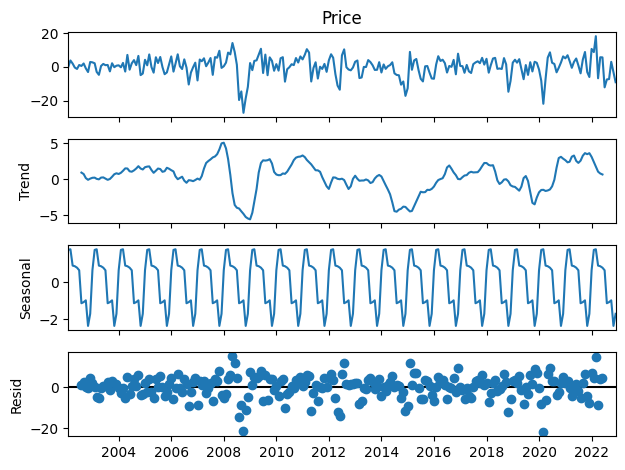

In [26]:
# visualize the components of the differenced data
decomposition = seasonal_decompose(differenced_data["Price"], model="additive")  # "Price" is likely your column name for oil prices
decomposition.plot()  # Visualize the trend, seasonal component, and residuals


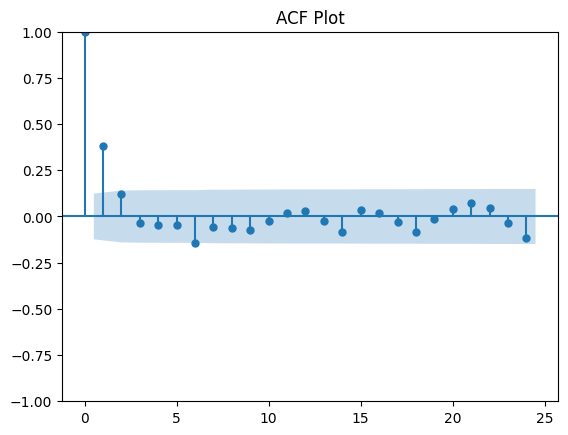

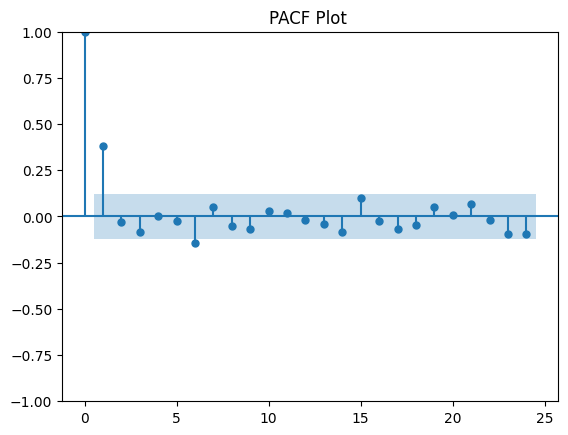

In [27]:
# ACF and PACF plots (optional) using lags of 60 (5 years)
plot_acf(differenced_data['Price'], title='ACF Plot')
plt.show()
plot_pacf(differenced_data['Price'], title='PACF Plot ')
plt.show()

In [28]:


df_2002 = data['2002']
df_2003 = data['2003']
df_2004 = data['2004']
df_2005 = data['2005']
df_2006 = data['2006']
df_2007 = data['2007']
# Create subplot figure
fig = make_subplots(rows=6, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=df_2002.index, y=df_2002['Price'], name='Price in 2002'), row=1, col=1)
fig.add_trace(go.Scatter(x=df_2003.index, y=df_2003['Price'], name='Price in 2003'), row=2, col=1)
fig.add_trace(go.Scatter(x=df_2004.index, y=df_2004['Price'], name='Price in 2004'), row=3, col=1)
fig.add_trace(go.Scatter(x=df_2005.index, y=df_2005['Price'], name='Price in 2005'), row=4, col=1)
fig.add_trace(go.Scatter(x=df_2006.index, y=df_2006['Price'], name='Price in 2006'), row=5, col=1)
fig.add_trace(go.Scatter(x=df_2007.index, y=df_2007['Price'], name='Price in 2007'), row=6, col=1)


# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_xaxes(title_text="Date", row=4, col=1)
fig.update_xaxes(title_text="Date", row=5, col=1)
fig.update_xaxes(title_text="Date", row=6, col=1)




# Update yaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)
fig.update_yaxes(title_text="Price", row=2, col=1)
fig.update_yaxes(title_text="Price", row=3, col=1)
fig.update_yaxes(title_text="Price", row=4, col=1)
fig.update_yaxes(title_text="Price", row=5, col=1)
fig.update_yaxes(title_text="Price", row=6, col=1)


# Update layout
fig.update_layout(height=1000, width=1200, title_text="Price from 2002 to 2007")

fig.show()

In [29]:
# Check for stationarity on differenced data with ADF test
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Data is likely stationary.")
    else:
        print("Data may be non-stationary. Consider differencing.")

print("Testing stationarity of scaled training data:")
adf_test(differenced_data['Price'])

Testing stationarity of scaled training data:
ADF Statistic: -10.452416485113096
p-value: 1.426848496782211e-18
Data is likely stationary.


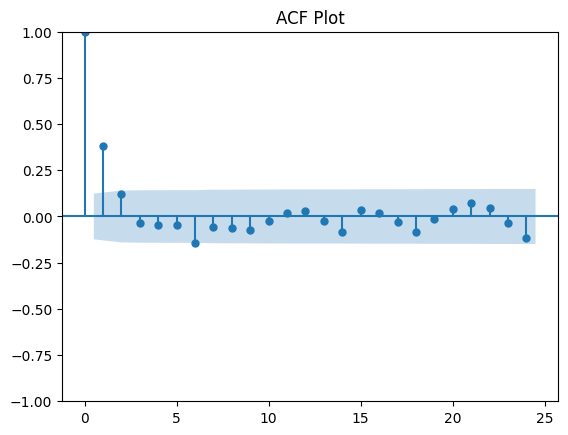

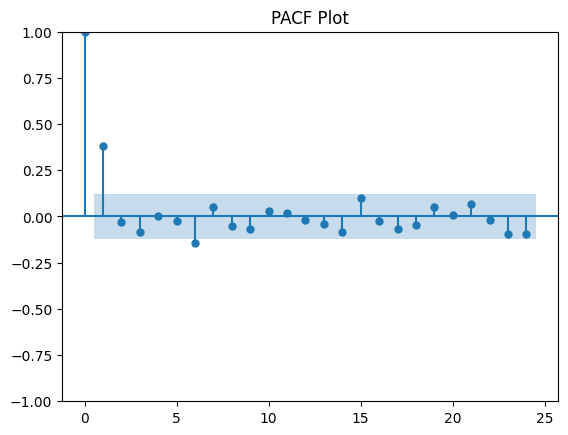

In [30]:
# ACF and PACF plots on differenced data
plot_acf(differenced_data['Price'], title='ACF Plot')
plt.show()
plot_pacf(differenced_data['Price'], title='PACF Plot')
plt.show()

In [32]:
# Use auto_arima to find best parameters
model = auto_arima(differenced_data['Price'], start_p=1, start_q=1, max_p=3, max_q=3,
                  start_P=0, seasonal=True, d=None, max_d=2, D=1, max_D=2, trace=True,
                  error_action='ignore', suppress_warnings=True,
                  stepwise=True)
print(f"\nAuto ARIMA identified parameters: {model.order}, {model.seasonal_order}")
# decide tradeoff between time and aic

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1576.932, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1612.420, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1575.066, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1579.935, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1610.842, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1576.870, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1575.145, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1573.222, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1575.037, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1575.095, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1578.181, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1573.727, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.653 seconds

Auto ARIMA identified parameters: (1, 0, 0), (0, 0, 0, 0)


In [33]:
print(f'model order: {model.order}, \nmodel seasonal order: {model.seasonal_order}')

model order: (1, 0, 0), 
model seasonal order: (0, 0, 0, 0)


In [34]:
# Fit the SARIMA model on the differenced training data
model = SARIMAX(endog=differenced_data, order=model.order, seasonal_order=model.seasonal_order, freq="MS")
results = model.fit(disp=0)  # Suppress convergence output
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  251
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -784.611
Date:                Fri, 05 Apr 2024   AIC                           1573.222
Time:                        06:22:23   BIC                           1580.273
Sample:                    02-01-2002   HQIC                          1576.060
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3831      0.043      8.923      0.000       0.299       0.467
sigma2        30.3674      2.072     14.656      0.000      26.306      34.429
Ljung-Box (L1) (Q):                   0.03   Jarque-

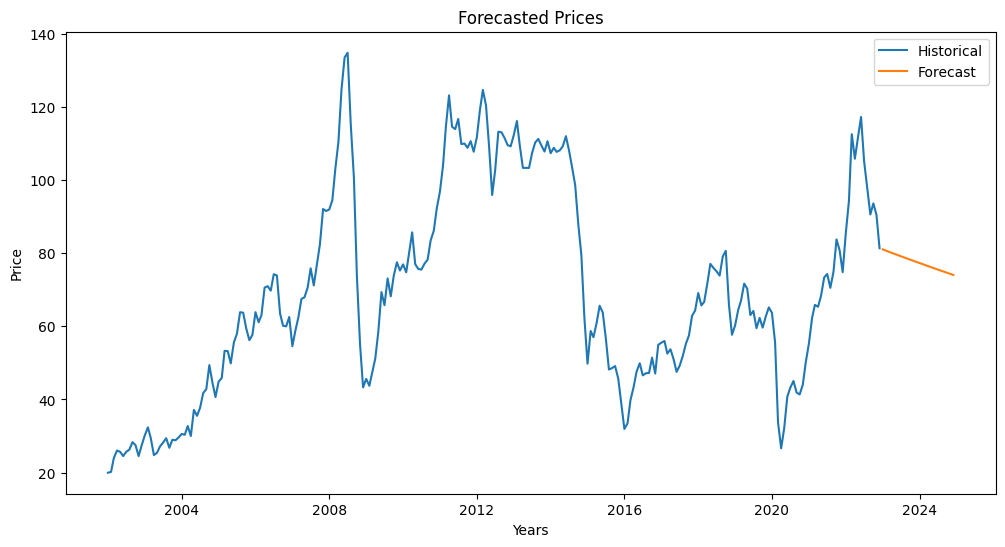

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame with a 'Price' column
history = data['Price']
HORIZON = 24

# Assuming 'model' is a previously defined SARIMAX model
order = model.order
seasonal_order = model.seasonal_order

# Fit the model and forecast the next 24 steps
model = SARIMAX(endog=history, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()
predictions = model_fit.forecast(steps=HORIZON)

# Create a date range for the forecast period
forecast_period = pd.date_range(start=history.index[-1], periods=HORIZON+1, freq='MS')[1:]

# Convert predictions to a pandas Series with the forecast period as index
predictions = pd.Series(predictions, index=forecast_period)

# Plot the history and the forecast
plt.figure(figsize=(12, 6))
plt.plot(history, label='Historical')
plt.plot(predictions, label='Forecast')
plt.title('Forecasted Prices')
plt.xlabel('Years')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
# Get confidence intervals of forecasts
forecast_intervals = forecast.conf_int()
forecast_intervals.head()

NameError: name 'forecast' is not defined

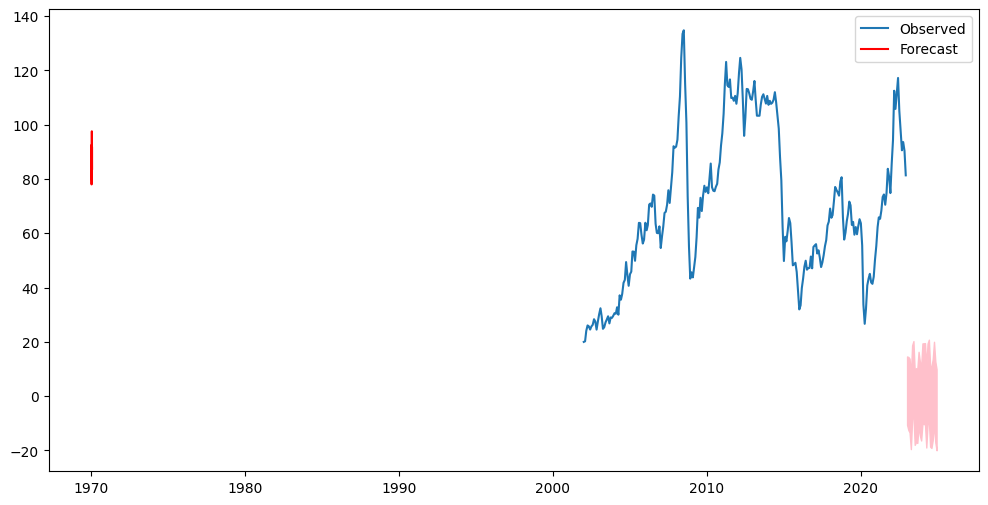